# **Take Home Test #1 (ACS234)**

## **Background Information**
The dataset, named, LondonAirQuality(2010_2018).csv,  contains information on air quality (monthly averaged data) in London for the period of 2010 to 2018. The `pandas` and `numpy` libraries will be used to analyse said dataset. `matplotlib` will be used for data visualisation.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Before performing any analysis, the data needs to be extracted from the raw CSV/Excel file into a `DataFrame` object.  

In [2]:
df = pd.read_excel("LondonAirQuality(2010_2018)_v2.xlsx")

## **Question 1**

a. Find the correlation coefficient between y and xi (i = 1, 2, ... 6) respectively. Determine the most appropriate independent variable to select for a simple linear regression model with y.

In [3]:
y = df.columns[-1]
x_best = None
cc_best = 0

for i in range(-7, -1):
    x = df.columns[i]
    cc_curr = df[y].corr(df[x], method="pearson")
    print(f"Correlation Coefficient (y|x{i+8}): {cc_curr:.2f}")
    if cc_curr > cc_best:
        x_best = x
        cc_best = cc_curr

print(f"\nStrongest Correlation - {x_best}, {cc_best:.2f}")

Correlation Coefficient (y|x1): 0.49
Correlation Coefficient (y|x2): 0.66
Correlation Coefficient (y|x3): 0.61
Correlation Coefficient (y|x4): -0.28
Correlation Coefficient (y|x5): 0.37
Correlation Coefficient (y|x6): 0.91

Strongest Correlation - Background:PM10 Particulate (ug/m3), 0.91


b. Calculate the appropriate coefficients for a simple linear regression model between the best-fit independent variable and y

In [4]:
k, m = np.polyfit(df[x_best], df[y], 1)
print(f"m: {m:.3f}, k: {k:.3f}")

m: -3.217, k: 0.853


The solution can be validated using a simple data visualisation

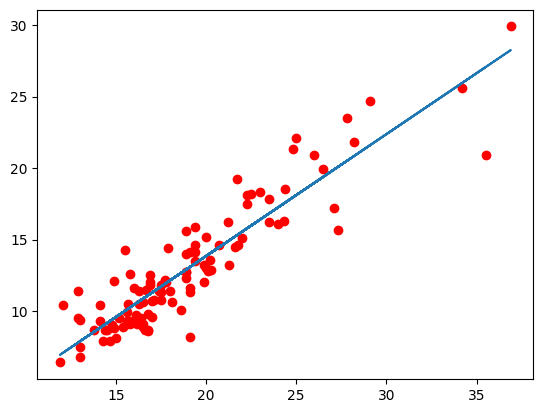

In [5]:
plt.plot(df[x_best], df[y], 'ro')
plt.plot(df[x_best], df[x_best]*k + m)

# Question 2

a. Fit a *multiple* linear regression model for the dataset using the x1, x2 ... x5 independent variables.

In [6]:
X = df[df.columns[-7:-2]].values
X_ones = np.c_[np.ones(len(df.index)), X]
Y = df[y].values.reshape(-1,1)

coefficients = np.matmul(np.linalg.inv(np.matmul(X_ones.T, X_ones)), np.matmul(X_ones.T, Y))

for i in range(len(coefficients)):
    print(f"Coefficient (a{i}): {coefficients[i][0]:.3f}")

Coefficient (a0): -9.458
Coefficient (a1): -0.195
Coefficient (a2): 0.317
Coefficient (a3): 0.178
Coefficient (a4): 0.117
Coefficient (a5): 0.532


b. Calculate MSE (mean squared error) and R2 (coefficient of determination) for the fitted model. 

In [7]:
Y_mean = np.mean(Y)
St = sum((Yi-Y_mean)**2 for Yi in Y)[0]
Sr = sum((Y[i]-(-9.458-0.195*X[i][0]+0.317*X[i][1]+0.178*X[i][2]+0.117*X[i][3]+0.532*X[i][4]))**2 for i in range(len(Y)))[0]
R2 = (1 - Sr/St)
R2_percent = R2*100

print(f"Coefficient of Determination (R^2): {R2:.3f} ({R2_percent:.3f}%)")

MSE = Sr / len(Y)

print(f"Mean Squared Error (MSE): {MSE:.3f}")

Coefficient of Determination (R^2): 0.565 (56.524%)
Mean Squared Error (MSE): 8.390
